### Radio and X-ray luminosity evolution for J1832-0911

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    "pdf.fonttype": 42,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 0.8,
})

cm = 1/2.54  # centimeters in inches

In [2]:
import pandas as pd

radiodf = pd.read_csv("../data/J1832-0911.radio.ltlc.csv")
# note - x-ray data is integrated in the code

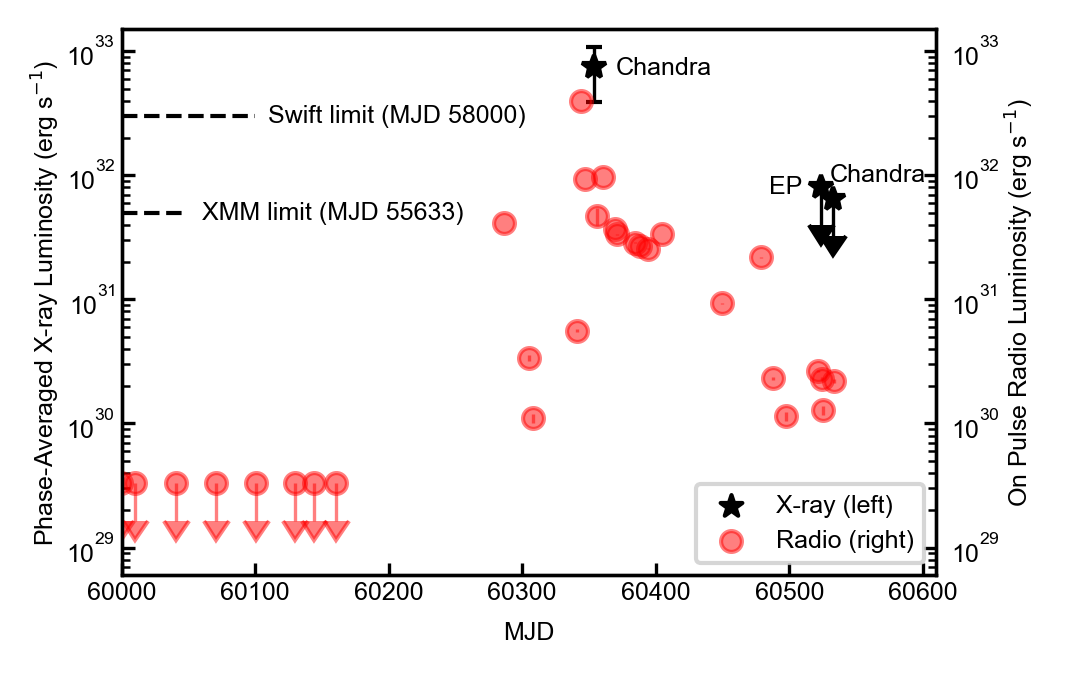

In [3]:
fig = plt.figure(figsize=(8.9*cm, 6*cm), dpi=300)

ax1 = fig.add_subplot(1, 1, 1)
ax1.errorbar(55633, 2e30, yerr=1e30, uplims=True, marker="*", color="k")
ax1.errorbar(57935.5, 3e32, yerr=1.5e32, xerr=547.5, uplims=True, marker="*", capsize=2, color="k")
ax1.errorbar(60354, 7.4e32, yerr=3.5e32, marker="*", color="k", capsize=2, markersize=6)
ax1.errorbar(60524, 8e31, yerr=4e31, uplims=True, marker="*", color="k", markersize=6)
ax1.errorbar(60533, 6.5e31, yerr=3.25e31, uplims=True, marker="*", color="k", markersize=6)

ax1.text(60370, 7.4e32, "Chandra", ha="left", va="center")
ax1.text(60510, 8e31, "EP", ha="right", va="center")
ax1.text(60530, 1e32, "Chandra", ha="left", va="center")

ax1.plot([60000, 60050], [5e31, 5e31], color="k", lw=1, ls="--")
ax1.text(60060, 5e31, "XMM limit (MJD 55633)", ha="left", va="center")
ax1.plot([60000, 60100], [3e32, 3e32], color="k", lw=1, ls="--")
ax1.text(60110, 3e32, "Swift limit (MJD 58000)", ha="left", va="center")

ax1.set_yscale("log")
ax1.set_xlim(60000, 60610)

ax2 = ax1.twinx()

for tel in ['VLA', 'ASKAP', 'ATCA', 'MeerKAT', 'GMRT']:
    non = radiodf[(radiodf["limit"] == 1) & (radiodf["telescope"] == tel)]
    ax2.errorbar(
        non["t"], non["flux"] * 2.2E28, yerr=non["flux"] * 0.5 * 2.2E28, uplims=True,
        ls = "", color="red", marker="o", alpha=0.5, markersize=5
    )
    
    det = radiodf[(radiodf["limit"] == 0) & (radiodf["telescope"] == tel)]
    ax2.errorbar(
        det["t"], det["flux"] * 2.2E28, yerr=det["fluxerr"] * 2.2E28,
        ls = "", color="red", marker="o", alpha=0.5, markersize=5
    )
    
ax2.scatter([], [], marker="*", color="k", label="X-ray (left)", s=30)
ax2.scatter([], [], marker="o", color="red", alpha=0.5, label="Radio (right)", s=25)
ax2.legend(loc="lower right", frameon=True,)

ax2.set_yscale("log")

# ax1.set_ylabel(r"Lunimosity (erg s$^{-1}$)")
ax1.set_ylabel(r"Phase-Averaged X-ray Luminosity (erg s$^{-1}$)", labelpad=1.0)
ax2.set_ylabel(r"On Pulse Radio Luminosity (erg s$^{-1}$)", labelpad=1.0)
ax1.set_xlabel("MJD")

ax1.set_ylim(6e28, 1.5e33)
ax2.set_ylim(6e28, 1.5e33)

ax1.tick_params(axis="both", which="major", pad=1.5)

fig.savefig("./radio_xray_lum_lc.pdf", bbox_inches="tight", dpi=300)